In [7]:
import pandas as pd
import numpy as np
import pickle
import math
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, average_precision_score, f1_score, silhouette_score, v_measure_score
from sklearn.cluster import KMeans
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
seed = 0
dataset1_df = pd.read_csv("dataset1/processed_full_data.csv")
dataset2_df = pd.read_csv("dataset2/processed_full_data.csv")

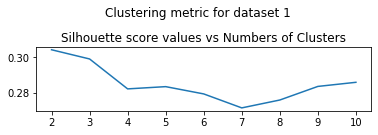

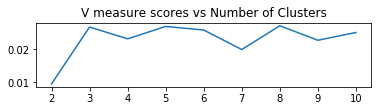

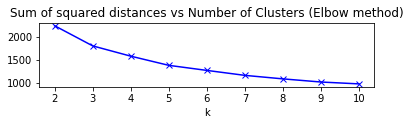

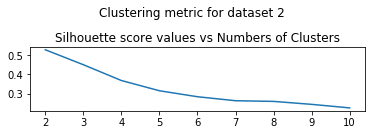

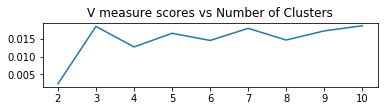

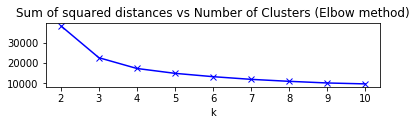

In [14]:
for idx, df in enumerate([dataset1_df, dataset2_df]):
    silhouette_score_values = []
    v_measures = []
    features = list(set(df.columns) - set(['label']))
    sum_sq_dists = []
    X = df[features]
    Y = df['label']
    K = np.arange(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, max_iter=300, random_state=seed, n_jobs=-1, algorithm='auto').fit(X)
        sum_sq_dists.append(kmeans.inertia_)
        cluster_labels = kmeans.predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_score_values.append(silhouette_avg)
        
        v_measure = v_measure_score(Y, cluster_labels)
        v_measures.append(v_measure)
        
    plt.suptitle(f'K-means clustering metric for dataset {idx+1}', y=1.02)
    
    plt.subplot(311)
    plt.plot(K, silhouette_score_values)
    plt.title("Silhouette score values vs Numbers of Clusters")
    plt.show()
    
    plt.subplot(312)
    plt.plot(K, v_measures)
    plt.title("V measure scores vs Number of Clusters")
    plt.show()

    plt.subplot(313)
    plt.plot(K, sum_sq_dists, 'bx-')
    plt.xlabel('k')
    plt.xticks(K)
    plt.title('Sum of squared distances vs Number of Clusters (Elbow method)')
    plt.show()

3 cluster for dataset1 and dataset2